# Project description

##### You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day. You need to study data collected over the last few years and determine which factors influence the price of a vehicle.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/vehicles_us.csv')

In [3]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [4]:
# number of ads in all of dataframe?
original_len = len(data)
original_len

51525

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [6]:
data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [7]:
#nulls per column
data.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [8]:
data['model_year'].describe()

count    47906.000000
mean      2009.750470
std          6.282065
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

In [9]:
data['model_year'].value_counts()

2013.0    3549
2012.0    3468
2014.0    3448
2011.0    3375
2015.0    3323
          ... 
1954.0       1
1949.0       1
1948.0       1
1936.0       1
1929.0       1
Name: model_year, Length: 68, dtype: int64

In [10]:
data['model'].value_counts()

ford f-150                           2796
chevrolet silverado 1500             2171
ram 1500                             1750
chevrolet silverado                  1271
jeep wrangler                        1119
                                     ... 
ford f-250 super duty                 241
acura tl                              236
kia sorento                           236
nissan murano                         235
mercedes-benz benze sprinter 2500      41
Name: model, Length: 100, dtype: int64

In [11]:
data['model'].nunique()

100

In [12]:
data['condition'].value_counts()

excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: condition, dtype: int64

In [13]:
data['cylinders'].value_counts()

8.0     15844
6.0     15700
4.0     13864
10.0      549
5.0       272
3.0        34
12.0        2
Name: cylinders, dtype: int64

In [14]:
data['fuel'].value_counts()

gas         47288
diesel       3714
hybrid        409
other         108
electric        6
Name: fuel, dtype: int64

In [15]:
data['odometer'].value_counts()

0.0         185
140000.0    183
120000.0    179
130000.0    178
160000.0    167
           ... 
51595.0       1
111381.0      1
155940.0      1
43402.0       1
74063.0       1
Name: odometer, Length: 17762, dtype: int64

In [16]:
data['odometer'].describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

we notice 2 things:

* the min value is 0
* the max value is 990000 which is too high, we will look at it later and will probably be isolated as an outlier.

In [17]:
data['transmission'].value_counts()

automatic    46902
manual        2829
other         1794
Name: transmission, dtype: int64

In [18]:
data['type'].value_counts()

SUV            12405
truck          12353
sedan          12154
pickup          6988
coupe           2303
wagon           1541
mini-van        1161
hatchback       1047
van              633
convertible      446
other            256
offroad          214
bus               24
Name: type, dtype: int64

In [19]:
data['paint_color'].value_counts()

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

In [20]:
data['is_4wd'].value_counts()

1.0    25572
Name: is_4wd, dtype: int64

In [21]:
data['days_listed'].value_counts()

18     959
24     950
22     945
19     941
20     934
      ... 
263      1
182      1
261      1
217      1
223      1
Name: days_listed, Length: 227, dtype: int64

In [22]:
data['days_listed'].describe()

count    51525.00000
mean        39.55476
std         28.20427
min          0.00000
25%         19.00000
50%         33.00000
75%         53.00000
max        271.00000
Name: days_listed, dtype: float64

In [23]:
data['price'].describe()

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

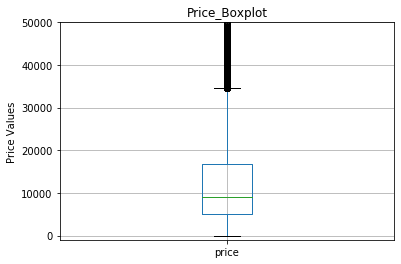

In [24]:
ax = data.boxplot('price');
plt.ylim(-1000,50000)

ax.set_title('Price_Boxplot');
ax.set_ylabel('Price Values');

we notice 2 things:

- min is too low ( 1 ) 
- max is too high in comaprison to the mean and median an will probably be isolated later as an outlier

### Conclusion

the variables are for the most part self-explanatory and logical. We have around 51K cars listed. 
For preprocessing, these are some pointers for **next steps**:
* Manage Missing Values
* convert floats to integers when needed.
* convert date_posted field to date time.
* Check is_4wd. Missing Values and values of 1 look like Boolean values which correspond to False and True respectively
* Model values include the mnanufacturer as the first string which we can extract
* make sure all strings are lower case.
* check odometer value of 0
* check outliers that must be removed.

### Step 2. Data preprocessing

In [25]:
#strings to lower case
for col in ['model', 'fuel' , 'transmission', 'type', 'paint_color', 'condition']:
    data[col] = data[col].str.lower()

In [26]:
# converting data type of date_posted field
data['date_posted'] = pd.to_datetime(data['date_posted'])

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null datetime64[ns]
days_listed     51525 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 5.1+ MB


As date_posted is now correctly a date time we are able to do date functions.

In [28]:
#% of records of miising values / null per variable
data.isna().sum() / len(data)

price           0.000000
model_year      0.070238
model           0.000000
condition       0.000000
cylinders       0.102086
fuel            0.000000
odometer        0.153168
transmission    0.000000
type            0.000000
paint_color     0.179854
is_4wd          0.503697
date_posted     0.000000
days_listed     0.000000
dtype: float64

There are 5 columns with Missing Values. will look at each one

In [29]:
#% of records where is4wd that is null
data['is_4wd'].isna().sum() / len(data)

0.5036972343522562

In [30]:
data['is_4wd'].value_counts()

1.0    25572
Name: is_4wd, dtype: int64

50% of values are missing. as said before, most likely they represent boolean values where the missing one are false.

In [31]:
#is4wd
data['is_4wd'] = data['is_4wd'].fillna(0)

In [32]:
data['is_4wd'].value_counts()

0.0    25953
1.0    25572
Name: is_4wd, dtype: int64

In [33]:
data['is_4wd'] = data['is_4wd'].astype('bool')

In [34]:
# confirm is4d boolean and no nulls
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          51525 non-null bool
date_posted     51525 non-null datetime64[ns]
days_listed     51525 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 4.8+ MB


In [35]:
#% of records where paint color that is null
data['paint_color'].isna().sum() / len(data)

0.17985443959243086

Paint color is empty in 18% of the records. which is alot to drop. lets see iff we can fill them with something.

In [36]:
data['paint_color'].value_counts()

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

In [37]:
#locate records where paint is empty
paint_color_empty = data[data['paint_color'].isnull()]

In [38]:
paint_color_empty['model_year'].value_counts()

2013.0    675
2014.0    643
2015.0    613
2012.0    605
2011.0    598
2016.0    552
2010.0    484
2008.0    483
2007.0    482
2017.0    424
2009.0    399
2018.0    390
2006.0    387
2005.0    354
2004.0    285
2003.0    280
2002.0    198
2001.0    136
2000.0    117
1999.0     86
2019.0     71
1997.0     67
1998.0     60
1995.0     38
1996.0     36
1993.0     22
1994.0     20
1989.0     12
1992.0     11
1988.0     11
1990.0     10
1991.0      8
1986.0      6
1984.0      6
1980.0      5
1966.0      5
1977.0      4
1978.0      4
1987.0      3
1982.0      3
1985.0      3
1968.0      2
1975.0      2
1969.0      2
1963.0      2
1972.0      1
1965.0      1
1958.0      1
1967.0      1
1976.0      1
1960.0      1
1962.0      1
1973.0      1
1971.0      1
1970.0      1
1981.0      1
Name: model_year, dtype: int64

Newer cars (starting 1999) are more likely to have this field empty. and as there is no way to determine the color i will fill them with "unknown"

In [39]:
data['paint_color'] = data['paint_color'].fillna('unknown')

In [40]:
data['paint_color'].value_counts()

white      10029
unknown     9267
black       7692
silver      6244
grey        5037
blue        4475
red         4421
green       1396
brown       1223
custom      1153
yellow       255
orange       231
purple       102
Name: paint_color, dtype: int64

In [41]:
#% of records where model_year that is null
data['model_year'].isna().sum() / len(data)

0.07023774866569626

only 7% of the records do not have the model year. it is not possible to determine the year and it could impact our result so theese values will be dropped.

In [42]:
data = data.dropna(subset=['model_year'])

In [43]:
len(data) / original_len

0.9297622513343038

In [44]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,suv,unknown,True,2018-06-23,19
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,unknown,False,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,True,2018-06-20,15


In [45]:
#% of records where cylinders is null
data['cylinders'].isna().sum() / len(data)

0.10222101615664009

Despite droppping all records with model_year null, we still have 10% of the remaning data with cylinders data missing. If we drop anoter 10% we would have lost almost 20% of the data. It is better to fill it.

In [46]:
data['cylinders'].describe()

count    43009.000000
mean         6.126276
std          1.659540
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

In [47]:
# filled nulls with median
data['cylinders'] = data['cylinders'].fillna(data['cylinders'].median())

In [48]:
#number of records where cylinders is empty after filling (should be 0)
data['cylinders'].isna().sum()

0

To find out what to replace the null cylinders values, I looked into the descriptive measures and found that the median and the Average are actually pretty equal so this indicates there arent any major outliers and the center of the data is representative. while looking at Q1 and Q3 i found that 50% of the data are from 4 to 8 so the median which is right in the middle seems like a fair representation and was used to fill in the nulls here.

Missing Values could be found due to several reasons depending on the parameter:

- In the paint-color column the missing values were in the new models and therefore I can assume that in the modern cars the colors are more varied with complicated names like " deep sea Aqua" .. etc. thus the colors were not mentioned.
- In the 4_WD coloumn the missing values were only the False values, therefore this could be explained that the only input available in the ad was a check box which would only input 1 in the system if it was checked.
- in general it can be due to a user error.


In [49]:
#% of records where odometer that is null
data['odometer'].isna().sum() / len(data)

0.15327933870496388

there is 15% of the data without values for odometer. and here a slight variation should not have an effect on price so I will fill it and will use the same method as in cylinders to find the best value for filling.

In [50]:
data['odometer'].describe()

count     40563.000000
mean     115425.444099
std       65219.802462
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

In [51]:
# filled nulls with median
data['odometer'] = data['odometer'].fillna(data['odometer'].median())

In [52]:
#number of records where odometer is empty (should be 0)
data['odometer'].isna().sum()

0

In [53]:
#% of nulls per column
data.isna().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

In [54]:
# data kept
len(data) / original_len

0.9297622513343038

after filling all the missing values we have managed to keep around 93% of the origianl data.

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47906 entries, 0 to 51524
Data columns (total 13 columns):
price           47906 non-null int64
model_year      47906 non-null float64
model           47906 non-null object
condition       47906 non-null object
cylinders       47906 non-null float64
fuel            47906 non-null object
odometer        47906 non-null float64
transmission    47906 non-null object
type            47906 non-null object
paint_color     47906 non-null object
is_4wd          47906 non-null bool
date_posted     47906 non-null datetime64[ns]
days_listed     47906 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 4.8+ MB


In [56]:
#change floats to integers (now that nulls are removed)

data['model_year'] = data['model_year'].astype('int')
data['cylinders'] = data['cylinders'].astype('int')
data['odometer'] = data['odometer'].astype('int')

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47906 entries, 0 to 51524
Data columns (total 13 columns):
price           47906 non-null int64
model_year      47906 non-null int64
model           47906 non-null object
condition       47906 non-null object
cylinders       47906 non-null int64
fuel            47906 non-null object
odometer        47906 non-null int64
transmission    47906 non-null object
type            47906 non-null object
paint_color     47906 non-null object
is_4wd          47906 non-null bool
date_posted     47906 non-null datetime64[ns]
days_listed     47906 non-null int64
dtypes: bool(1), datetime64[ns](1), int64(5), object(6)
memory usage: 4.8+ MB


now we start checking the vehicles with value 0 in odometer.

In [58]:
odometer_0 = data.loc[data['odometer']==0]
odometer_0['condition'].value_counts()

good         94
excellent    66
fair          6
like new      4
salvage       2
Name: condition, dtype: int64

In [59]:
# records with 0 for odometer value
len(odometer_0) / len(data)

0.003590364463741494

there are records with 0 Odometer values, the percentage is insignificant so i will leave for now.

In [60]:
# % data left
len(data) / original_len

0.9297622513343038

In [61]:
# % data dropped
1-(len(data) / original_len)

0.07023774866569621

In [62]:
# checking for duplicates:
data.duplicated().sum()

0

there are no duplicates found.

### Conclusion

preprocessing was done as follows:
- data types were corrected :
  * date_posted --> data time
  * numeric values --> integers 
  * strings columns were converted to lower case strings .
- is_4wd was filled with 0 and then changed to boolean
- model-years missing values were dropped.
- paint_color was filled with "unknown" 
- odometer and cylinders were filled with the median. 
- no duplicates were found.

after preprocessing we are left with 93% of the original dataset.


### Step 3. Make calculations and add them to the table

check Date Range and add new Columns

In [63]:
#Date range of data
print('Date Range from ', data['date_posted'].min(),' to ', data['date_posted'].max())

Date Range from  2018-05-01 00:00:00  to  2019-04-19 00:00:00


Now we can tell data  includes postings from **May 1st, 2018 to April 19, 2019**. Almost a full year.

In [64]:
#new columns for year, month, and day of week of posting, now that date_posted is the correct data type

data['year_posted'] = data['date_posted'].dt.year
data['month_posted'] = data['date_posted'].dt.month
data['dow_posted'] = data['date_posted'].dt.weekday #note 0 is Monday

def dayname(weekday):
    if weekday == 0:
        return "monday"
    elif weekday == 1:
        return "tuesday"
    elif weekday == 2:
        return "wednesday"
    elif weekday == 3:
        return "thursday"
    elif weekday == 4:
        return "friday"
    elif weekday == 5:
        return "saturday"
    elif weekday == 6:
        return "sunday"
    
data['dow_posted'] = data['dow_posted'].apply(dayname)

In [65]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,dow_posted
0,9400,2011,bmw x5,good,6,gas,145000,automatic,suv,unknown,True,2018-06-23,19,2018,6,saturday
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2019,2,thursday
3,1500,2003,ford f-150,fair,8,gas,113000,automatic,pickup,unknown,False,2019-03-22,9,2019,3,friday
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2019,4,tuesday
5,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,2018,6,wednesday


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47906 entries, 0 to 51524
Data columns (total 16 columns):
price           47906 non-null int64
model_year      47906 non-null int64
model           47906 non-null object
condition       47906 non-null object
cylinders       47906 non-null int64
fuel            47906 non-null object
odometer        47906 non-null int64
transmission    47906 non-null object
type            47906 non-null object
paint_color     47906 non-null object
is_4wd          47906 non-null bool
date_posted     47906 non-null datetime64[ns]
days_listed     47906 non-null int64
year_posted     47906 non-null int64
month_posted    47906 non-null int64
dow_posted      47906 non-null object
dtypes: bool(1), datetime64[ns](1), int64(7), object(7)
memory usage: 5.9+ MB


lets add a new column: The vehicle's age (in years) when the ad was placed  (vehicle_age)

In [67]:
data['vehicle_age'] = data['year_posted'] - data['model_year']

In [68]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,dow_posted,vehicle_age
0,9400,2011,bmw x5,good,6,gas,145000,automatic,suv,unknown,True,2018-06-23,19,2018,6,saturday,7
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2019,2,thursday,6
3,1500,2003,ford f-150,fair,8,gas,113000,automatic,pickup,unknown,False,2019-03-22,9,2019,3,friday,16
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2019,4,tuesday,2
5,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,2018,6,wednesday,4


lets add a new column: The vehicle's average mileage per year (avg_miles_per_year)

In [69]:
data['avg_miles_per_year'] = data['odometer'] / data['vehicle_age']

In [70]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,dow_posted,vehicle_age,avg_miles_per_year
0,9400,2011,bmw x5,good,6,gas,145000,automatic,suv,unknown,True,2018-06-23,19,2018,6,saturday,7,20714.285714
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2019,2,thursday,6,18333.333333
3,1500,2003,ford f-150,fair,8,gas,113000,automatic,pickup,unknown,False,2019-03-22,9,2019,3,friday,16,7062.500000
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2019,4,tuesday,2,40451.500000
5,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,2018,6,wednesday,4,14488.500000


In [71]:
data['avg_miles_per_year'].describe()

count    4.790400e+04
mean              inf
std               NaN
min      0.000000e+00
25%      1.054545e+04
50%      1.541743e+04
75%      2.300000e+04
max               inf
Name: avg_miles_per_year, dtype: float64

In [72]:
# why inf. Maybe there are vehicles with 0 age
data['vehicle_age'].min()

0

In [73]:
#replacing inf values with current odometer
data['avg_miles_per_year'] = data['avg_miles_per_year'].where(data['vehicle_age'] != 0, data['odometer'])

In [74]:
data['avg_miles_per_year'].max()

373200.0

as mentioned above , we can add a new column (manufacturer) by extracting the firest string from the model column.

In [75]:
data['manufacturer'] = data['model'].str.split().str[0]

In [76]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,dow_posted,vehicle_age,avg_miles_per_year,manufacturer
0,9400,2011,bmw x5,good,6,gas,145000,automatic,suv,unknown,True,2018-06-23,19,2018,6,saturday,7,20714.285714,bmw
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2019,2,thursday,6,18333.333333,hyundai
3,1500,2003,ford f-150,fair,8,gas,113000,automatic,pickup,unknown,False,2019-03-22,9,2019,3,friday,16,7062.500000,ford
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2019,4,tuesday,2,40451.500000,chrysler
5,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,2018,6,wednesday,4,14488.500000,chrysler


In [77]:
data['manufacturer'].value_counts()

ford             11790
chevrolet         9885
toyota            5059
honda             3244
ram               3087
jeep              3041
nissan            2969
gmc               2207
subaru            1178
dodge             1158
hyundai           1099
volkswagen         809
chrysler           780
kia                544
cadillac           295
buick              257
bmw                246
acura              224
mercedes-benz       34
Name: manufacturer, dtype: int64

lets replace the condition with numeric scale

In [78]:
data['condition'].value_counts()

excellent    23074
good         18695
like new      4409
fair          1492
new            133
salvage        103
Name: condition, dtype: int64

In [79]:
def condition_numeric(condition):
    if condition == 'new':
        return 5
    elif condition == 'like new':
        return 4
    elif condition == 'excellent':
        return 3
    elif condition == 'good':
        return 2
    elif condition == 'fair':
        return 1
    elif condition == 'salvage':
        return 0
    else: 
        pass
    
data['condition'] = data['condition'].apply(condition_numeric)

In [80]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,dow_posted,vehicle_age,avg_miles_per_year,manufacturer
0,9400,2011,bmw x5,2,6,gas,145000,automatic,suv,unknown,True,2018-06-23,19,2018,6,saturday,7,20714.285714,bmw
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2019,2,thursday,6,18333.333333,hyundai
3,1500,2003,ford f-150,1,8,gas,113000,automatic,pickup,unknown,False,2019-03-22,9,2019,3,friday,16,7062.500000,ford
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2019,4,tuesday,2,40451.500000,chrysler
5,14990,2014,chrysler 300,3,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,2018,6,wednesday,4,14488.500000,chrysler


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47906 entries, 0 to 51524
Data columns (total 19 columns):
price                 47906 non-null int64
model_year            47906 non-null int64
model                 47906 non-null object
condition             47906 non-null int64
cylinders             47906 non-null int64
fuel                  47906 non-null object
odometer              47906 non-null int64
transmission          47906 non-null object
type                  47906 non-null object
paint_color           47906 non-null object
is_4wd                47906 non-null bool
date_posted           47906 non-null datetime64[ns]
days_listed           47906 non-null int64
year_posted           47906 non-null int64
month_posted          47906 non-null int64
dow_posted            47906 non-null object
vehicle_age           47906 non-null int64
avg_miles_per_year    47906 non-null float64
manufacturer          47906 non-null object
dtypes: bool(1), datetime64[ns](1), float64(1), int64(9),

### Conclusion

we added new columns which can be useful in future analysis 

### Step 4. Carry out exploratory data analysis

In [82]:
# saving the data before isolating the outliers
data_before = data.copy()

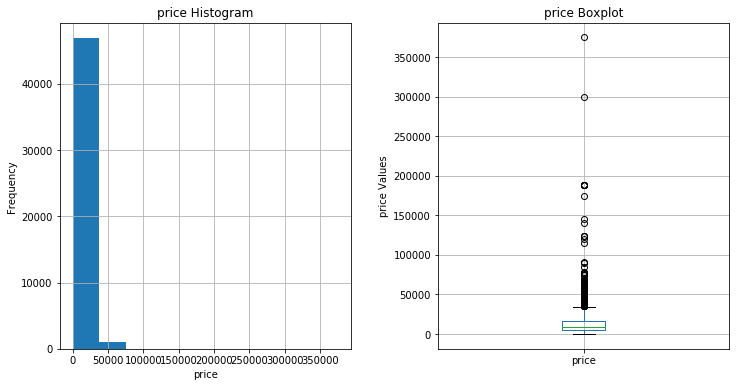

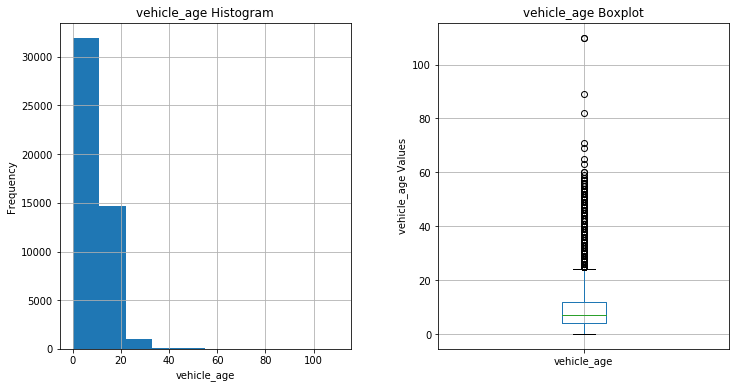

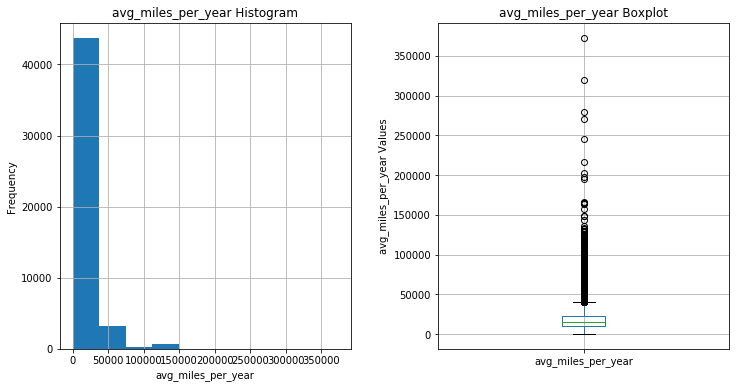

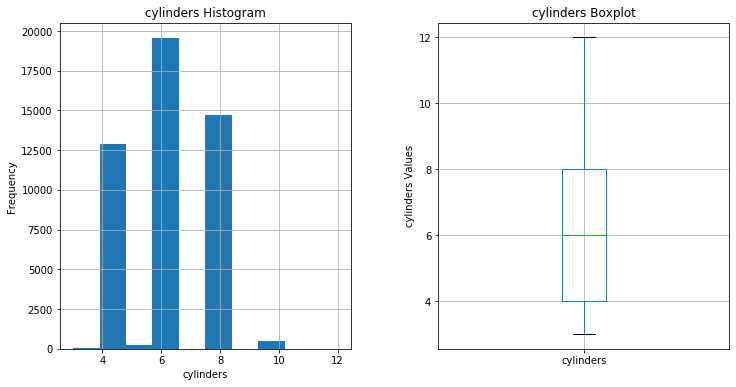

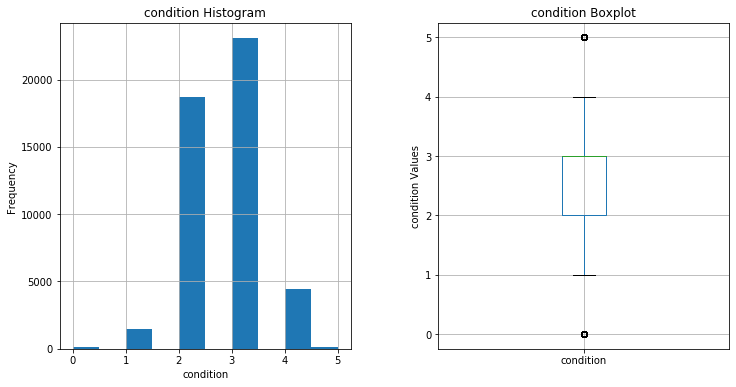

In [83]:
# plotting hist and box plots for our variables
for col in ['price', 'vehicle_age', 'avg_miles_per_year', 'cylinders', 'condition']:
    fig, axes = plt.subplots(1, 2, figsize=(12,6))
    data_before[col].hist(ax=axes[0])
    data_before.boxplot(col,ax=axes[1])
    plt.subplots_adjust(wspace = 0.3)
    
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequency')
    axes[1].set_ylabel(f'{col} Values')
    axes[0].set_title(f'{col} Histogram')
    axes[1].set_title(f'{col} Boxplot')

#### Price

As per the histogram, there are clearly extremes in the top range that need to be removed. otherwise our results will be affected with an unecessary values and factors.

#### Vehicle Age

here also there are clearly extremes in the top range that need to be removed.

#### Average Miles Per Year

As per the histogram, there are also extremes in the top range that need to be removed.

#### Cylinders

As per this histogram, there doesn't seem to be any significant outliers based on the numbers of cylinders

In [84]:
data['cylinders'].describe()

count    47906.000000
mean         6.113368
std          1.572898
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

After calculating mean and median, we can see that the average is very close to the median which is an indication that there arent significant outliers. we can try and isolate the outliers if there is any but as the number of cylinders is set from a specific range then there should be no outliers therefore i will not change anything here.

#### Condition

- As per this histogram, there doesn't seem to be any significant outliers.
- even though "condition" has numeric values but it is a categorical value so in my opinion it doesn't make sense to isolate the ouliers here as they are only scales and not values. 

now i wil start by isolating the outliers and i will use the same method for the first 3 parameters mentioned above (price - vehicle age - average miles per year). the outliers will be isolated based on IQR and then will drop these outliers and continue our analysis.

In [85]:
# isolating the outliers in a dict of dataframes

variable_outliers = {}
for col in ['price', 'vehicle_age', 'avg_miles_per_year']:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    bottom_limit = Q1 - (1.5*IQR)
    upper_limit = Q3 + 1.5 * IQR
    if bottom_limit < 0:
        bottom_limit = 0
    variable_outliers[col] = data.query(f'{col} < @bottom_limit or {col} > @upper_limit')

In [86]:
# number of outliers found for every parameter/variable and their percentage of the overall data
for key, value in variable_outliers.items():
    print (key,':',len(value))
    print ('percentage of outliers:' , len(value) / len(data))

price : 1546
percentage of outliers: 0.03227153174967645
vehicle_age : 737
percentage of outliers: 0.015384294242892331
avg_miles_per_year : 3214
percentage of outliers: 0.06708971736316954


We isolated outliers based on IQR (sticking to a traditional min/max in a boxplot). About 3 % of the data includes outliers for price. About 1.5% of the data includes outliers for vehicle age. Almost 7% of the data includes outliers based on average miles per year. these values should be dropped and not considered in the analysis.

and as mentioned above, i will not be dropping or finding any outliers in (Cylinders - Condition) parameters as i believe all the data there are valid for analysis.

In [87]:
#collect all outliers in 1 dataframe and dropping the duplicates
outliers = pd.concat(variable_outliers.values())
outliers.drop_duplicates(inplace=True)
len(outliers)

5108

In [88]:
len(outliers)/ len(data)

0.10662547488832297

Records that represent outliers make up 10% of the dataset. Now let's filter dataset to remove outliers

In [89]:
# removing Outliers
data_after = data[~data.index.isin(outliers.index)]
len(data_after) / len(data_before)

0.893374525111677

In [90]:
len(data_after) / original_len

0.8306259097525474

After preprocessing and removing outliers we are left with about **83% of the original dataset**. 

### Comaring Hist ( before and after removing outliers)

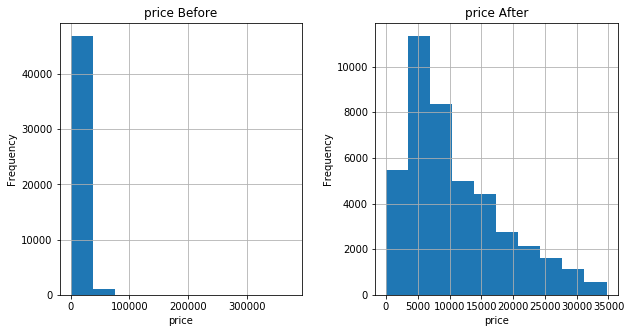

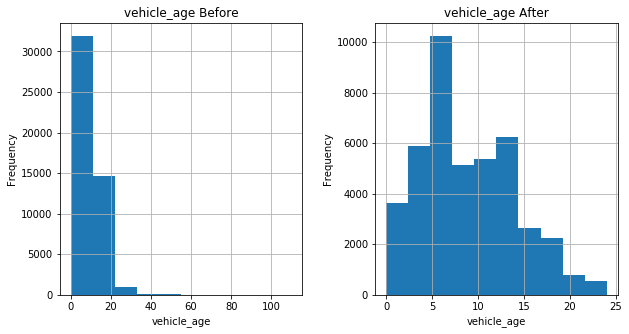

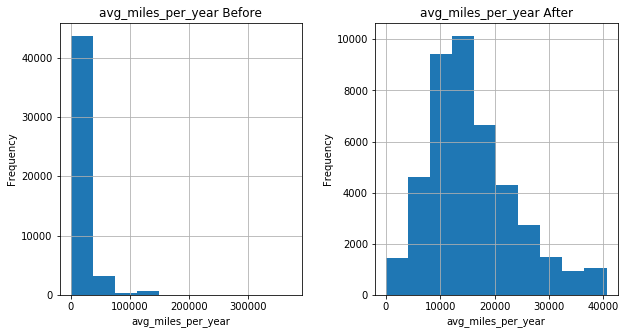

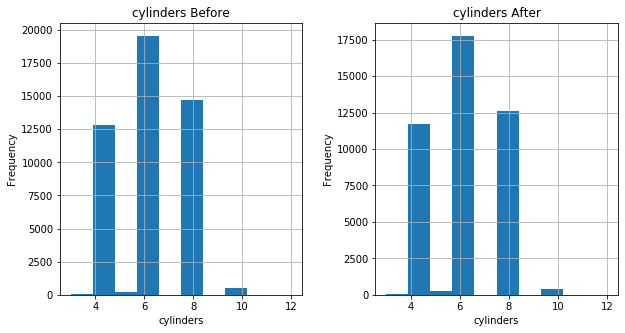

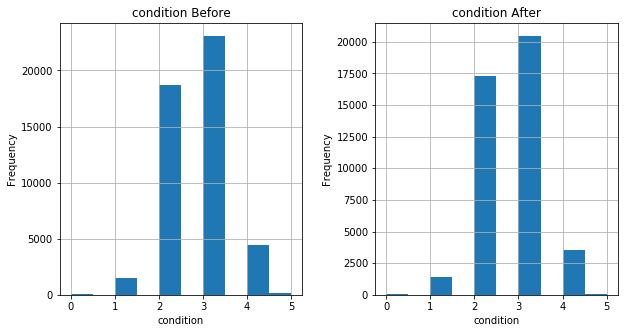

In [91]:
for col in ['price', 'vehicle_age', 'avg_miles_per_year', 'cylinders', 'condition']:
    fig, axes = plt.subplots(1, 2, figsize=(10,5))
    data_before[col].hist(ax=axes[0])
    data_after[col].hist(ax=axes[1])
    plt.subplots_adjust(wspace = 0.3)
    
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequency')
    axes[1].set_xlabel(col)
    axes[1].set_ylabel('Frequency')
    axes[0].set_title(f'{col} Before')
    axes[1].set_title(f'{col} After')

- Now that outliers are removed, we can now find what variables really affect "Price".
- The histogram looks better now after removing the outliers from “Price”.  Certain values are too low which can be suspected to point at an error in these values. However, we currently cannot confidently determine the existence or range of this error because of the lack of related information.
- Removing the outliers in the "vehicle age" gave us a more truthful representation to the values in our ads. 
- Now that the high milage values are removed , the left data looks more natural and realistic.
- As we didn't isolate any values (outliers) in Cylinders and Condition the histograms looks the same, with the exception of few minor changes that are related to the outliers found in other parameters.

### Days Listed

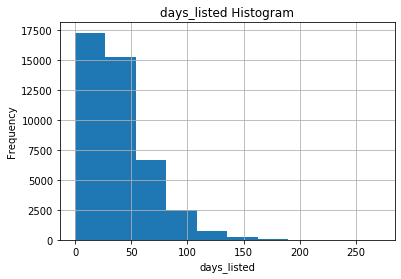

In [92]:
ax = data_after['days_listed'].hist();
ax.set_xlabel('days_listed');
ax.set_ylabel('Frequency');
ax.set_title('days_listed Histogram');

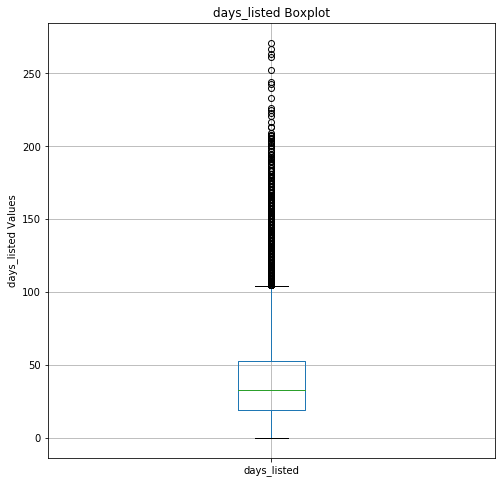

In [93]:
ax = data_after.boxplot('days_listed' , figsize=(8,8));
ax.set_title('days_listed Boxplot');
ax.set_ylabel('days_listed Values');

In [94]:
data_after['days_listed'].describe()

count    42798.000000
mean        39.572480
std         28.221088
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

In [95]:
data_after.groupby('model_year')['days_listed'].median()

model_year
1994    30.0
1995    32.0
1996    34.0
1997    33.0
1998    35.0
1999    33.0
2000    32.0
2001    35.0
2002    33.0
2003    32.0
2004    33.0
2005    34.0
2006    33.0
2007    33.5
2008    33.0
2009    33.0
2010    34.0
2011    34.0
2012    33.0
2013    33.0
2014    33.0
2015    33.0
2016    33.0
2017    33.0
2018    33.0
2019    36.0
Name: days_listed, dtype: float64

In [96]:
data_after.groupby('month_posted')['days_listed'].median()

month_posted
1     33
2     34
3     34
4     34
5     33
6     34
7     33
8     33
9     33
10    33
11    33
12    33
Name: days_listed, dtype: int64

In [97]:
data_after.groupby('condition')['days_listed'].median()

condition
0    33.5
1    33.0
2    33.0
3    33.0
4    33.0
5    36.0
Name: days_listed, dtype: float64

In [98]:
data_after.groupby('manufacturer')['days_listed'].median()

manufacturer
acura         33.5
bmw           34.0
buick         33.0
cadillac      34.0
chevrolet     33.0
chrysler      31.0
dodge         33.0
ford          33.0
gmc           34.0
honda         33.0
hyundai       32.5
jeep          33.0
kia           36.0
nissan        32.0
ram           33.0
subaru        33.0
toyota        33.0
volkswagen    32.0
Name: days_listed, dtype: float64

- 50% of our ads were listed for less than 33 days with about quarter of them lasting no more than 19 days. 
- It is noteworthy that other parameters like manufacturer, condition and month_posted didn't have an effect on this pattern.
- 25% of our ads were listed for over 53 days with one even reaching 271 days. 

- from the boxplot and the histogram above we can come to the assumption that the typical Ad would be listed for around 33 to 40 days as the 50% of our ads were listed for no more than 33 days and from the mean the average lifetime for an ad is about 39 days. But as the average are affected by the outliers we might have then i lean towards considering the median.
- from the descriptive stats of the days_listed we notice that 25% of our ad are listed for no more than 19 days with some even taken down in the same day (0 days listed), logically speaking if an ad was removed in a time shorter than 25% of our data then it can be considered as quickly removed. 
- we can also noticed that 25% of our ads were listed for more than 53 days therfore i lean towards considering that these ads have a relativey longlife time.
- from the boxplot we see that we have some ads that were listed for more than 100 days and even reaching 273 days and as these data are above the upper whisker of the boxplot they can be considered as listed for an abnormally long time. 
- from our grouped data we can see that the manufacturer, condition, month posted, and even model year have no effect on the median(typical life time of an ad)

**note:** I hope that I understood the task correctly and described the results in a clear way.

### Number of Ads

In [99]:
original_len

51525

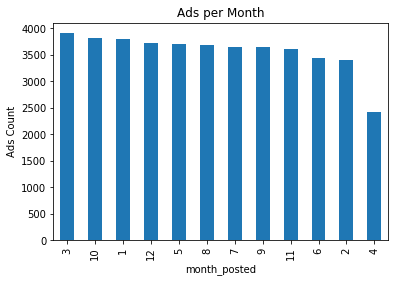

In [100]:
ax = data_after['month_posted'].value_counts().plot(kind='bar');
ax.set_xlabel('month_posted');
ax.set_ylabel('Ads Count');
ax.set_title('Ads per Month');

it is clear that the number of ads poted is relatively consistent and spread throughout the months equally.

**note**: we don't have the data for the whole April month therefore the count there is smaller than the rest.

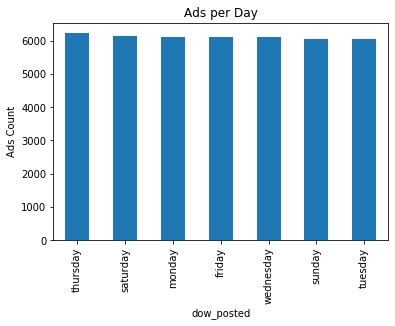

In [101]:
ax = data_after['dow_posted'].value_counts().plot(kind='bar');
ax.set_xlabel('dow_posted');
ax.set_ylabel('Ads Count');
ax.set_title('Ads per Day');

A consistent number of ads were placed during the range of dates in our dataset. The number of ads posted is about the same regardless of month or day of week (note - We don't have data for the full month of April). 

### Vehicle Type

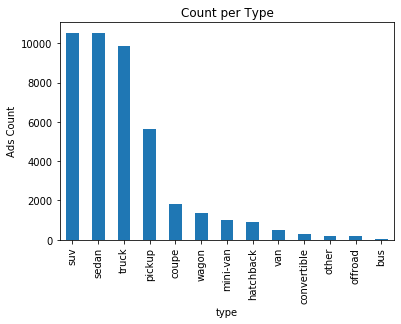

In [102]:
ax = data_after['type'].value_counts().plot(kind='bar');
ax.set_xlabel('type');
ax.set_ylabel('Ads Count');
ax.set_title('Count per Type');

In [103]:
data_after['type'].nunique()

13

In [104]:
data_after['type'].value_counts(normalize=True)

suv            0.246180
sedan          0.245479
truck          0.229894
pickup         0.131478
coupe          0.042081
wagon          0.032081
mini-van       0.023342
hatchback      0.020842
van            0.011987
convertible    0.007430
other          0.004673
offroad        0.003996
bus            0.000537
Name: type, dtype: float64

In [105]:
0.24+0.24+0.23+0.13

0.84

In [106]:
data_after.groupby('type')['price'].mean().sort_values(ascending=False)

type
bus            17445.913043
truck          14448.472304
pickup         14345.961436
offroad        13867.643275
coupe          12869.867851
convertible    12606.477987
suv            10077.957479
other           9599.690000
wagon           8659.356154
van             8150.434698
mini-van        7562.220220
sedan           6677.945745
hatchback       6541.572870
Name: price, dtype: float64

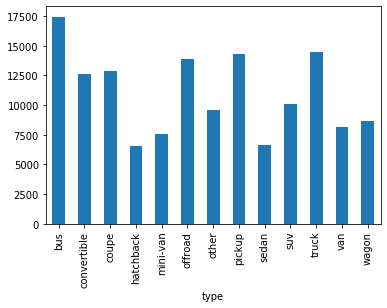

In [107]:
data_after.groupby('type')['price'].mean().plot(kind='bar');

In [108]:
data_after.groupby('type')['days_listed'].median().sort_values()

type
convertible    31
other          31
offroad        32
coupe          33
mini-van       33
pickup         33
sedan          33
truck          33
van            33
suv            34
wagon          35
hatchback      36
bus            40
Name: days_listed, dtype: int64

It is noticeable that the most prominent types of vehicles are SUV, sedan, truck and pickup. Although there are 13 types of vehicles included in the ads, the 4 above-mentioned types have around 84% of the sales share with SUV and Sedan in the lead.

Therefore we should consider our strategy regarding the less advertised vehicles.

- Despite having a high average price and an average listing duration, trucks and pickups are 2 of the most popular listings.

- Buses have the longest listing duration, highest average price and the least number of entries. the reason for their unpopularity should be therefore discussed further.
- On the other hand convertibles seem to be one of the most popular types as they have the shortest listing duration. They have one of the lowest listing share with an average price range.

### What factors impact price the most? 

##### SUV

In [109]:
suv = data_after.loc[data['type']=='suv']

In [110]:
#age - scatter

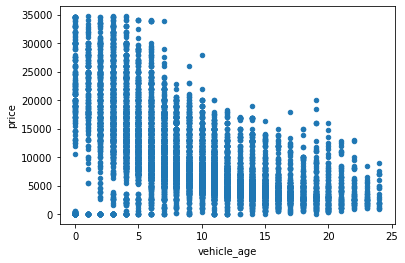

In [111]:
suv.plot(x="vehicle_age", y="price", kind='scatter')

Among SUVs, there seems to be a negative relationship between price and vehicle age. The newer the vehicle the higher the price and the older the vehicle, the lower the price.

In [112]:
#mileage - scatte

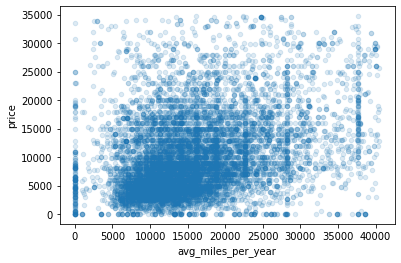

In [113]:
suv.plot(x="avg_miles_per_year", y="price", kind='scatter' , alpha= 0.15 );

Among SUVs, there doesn't seem to be an evident strong correlation between average miles per year and price. Unexpectedly, SUVs with low mileage did not have the highest price. 

In [114]:
#condition - scatter

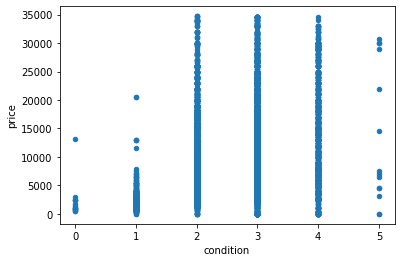

In [115]:
suv.plot(x="condition", y="price", kind='scatter' )

Among SUVs, there is a positive correlation between price and condition. As the condition improves (with the peak being "new"), price increases

In [116]:
#transmission type - box (remove categories with less than 50 ads)

In [117]:
suv['transmission'].value_counts()

automatic    9981
manual        424
other         131
Name: transmission, dtype: int64

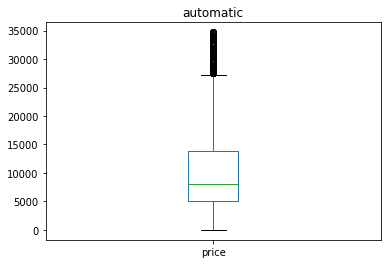

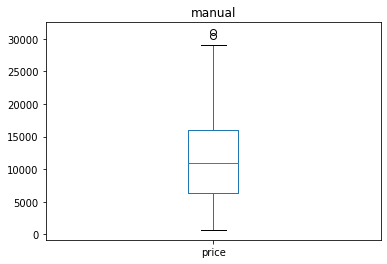

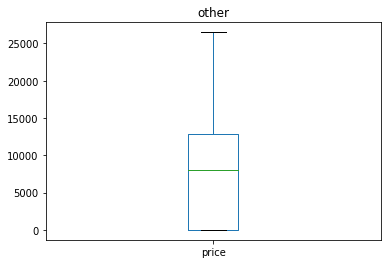

In [118]:
for name, group_data in suv.groupby('transmission'):
    group_data.plot(y='price', kind='box' , title=name)

Among SUVs, there seems to be a corelation between price and transmission type. We can see that vehicles with manual transmisson have a higher price than vehicles with automatic. Further research could be done to understand the relation more.

In [119]:
#color - box (remove categories with less than 50 ads)

In [120]:
suv['paint_color'].value_counts()

unknown    1899
black      1846
white      1620
silver     1349
grey       1016
blue        891
red         796
green       386
brown       323
custom      273
orange       63
yellow       38
purple       36
Name: paint_color, dtype: int64

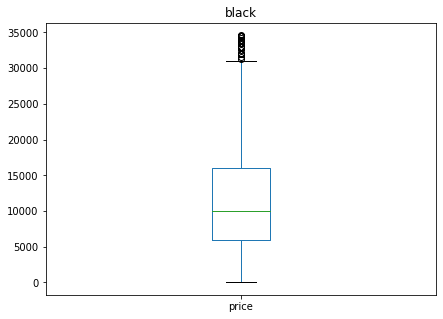

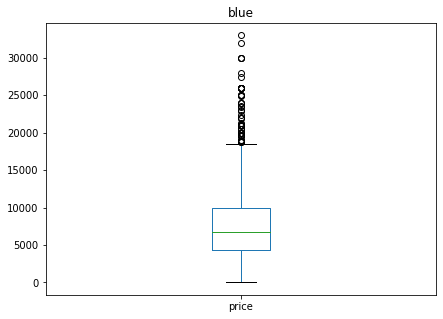

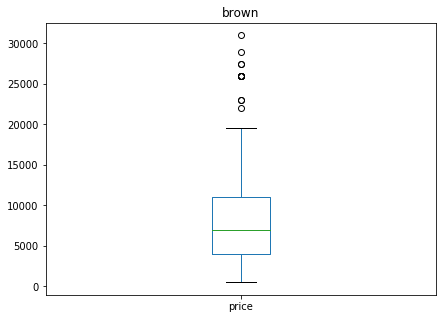

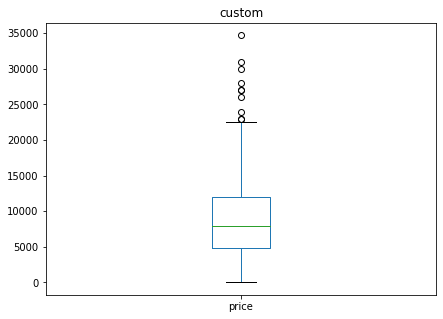

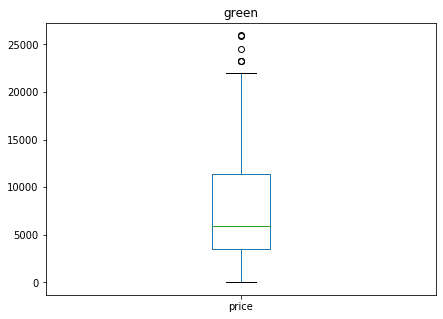

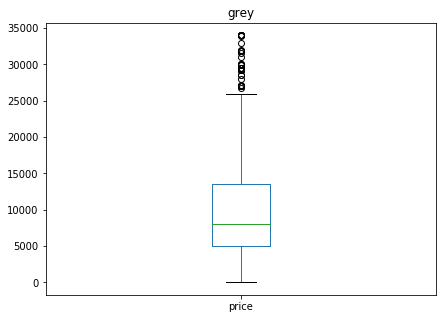

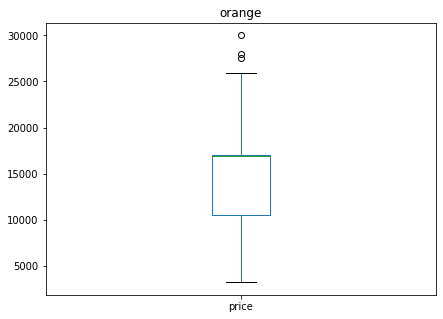

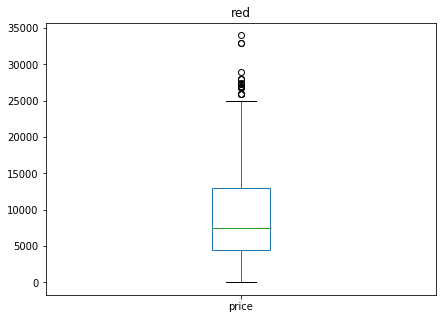

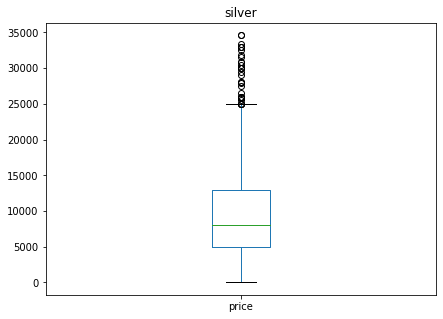

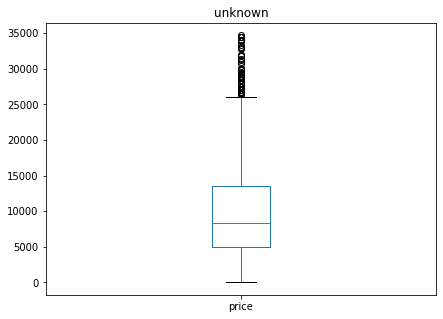

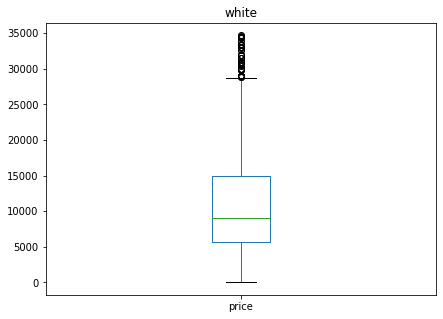

In [121]:
for name, group_data in suv.groupby('paint_color'):
    if len(group_data) > 50:
        group_data.plot(y='price', kind='box' , title=name , figsize= (7,5))

Among SUVs, we can see from this plot that for the most part there isn't a correlation between paint color and price with a few exceptions. Black vehicles cover the widest range of prices (unsursprisingly) . Orange also has a higher price. From personal observation, this is not not a common color so further research would be needed to understand the reason. Are orange vehicles used for a particular reason (e.g. for-hire vehicles)?

##### Sedan

In [122]:
sedan = data_after.loc[data['type']=='sedan']

In [123]:
sedan.corr()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,year_posted,month_posted,vehicle_age,avg_miles_per_year
price,1.000000,0.634653,0.296337,-0.022813,-0.531724,0.063900,0.001216,0.041996,-0.045058,-0.630324,0.254773
model_year,0.634653,1.000000,0.305384,-0.106778,-0.583432,0.073323,-0.002946,0.050987,-0.050618,-0.994736,0.540036
condition,0.296337,0.305384,1.000000,-0.039393,-0.312422,0.015091,-0.010897,0.019001,-0.011083,-0.303424,0.063036
cylinders,-0.022813,-0.106778,-0.039393,1.000000,0.056883,0.182928,0.004319,0.000868,-0.001379,0.106864,-0.070379
odometer,-0.531724,-0.583432,-0.312422,0.056883,1.000000,-0.053476,0.008693,-0.017150,0.022780,0.581654,0.173080
is_4wd,0.063900,0.073323,0.015091,0.182928,-0.053476,1.000000,0.011317,-0.005923,0.011502,-0.073928,0.033335
days_listed,0.001216,-0.002946,-0.010897,0.004319,0.008693,0.011317,1.000000,0.015678,-0.011913,0.004554,0.000411
year_posted,0.041996,0.050987,0.019001,0.000868,-0.017150,-0.005923,0.015678,1.000000,-0.822087,0.051614,-0.098091
month_posted,-0.045058,-0.050618,-0.011083,-0.001379,0.022780,0.011502,-0.011913,-0.822087,1.000000,-0.033730,0.078882
vehicle_age,-0.630324,-0.994736,-0.303424,0.106864,0.581654,-0.073928,0.004554,0.051614,-0.033730,1.000000,-0.550082


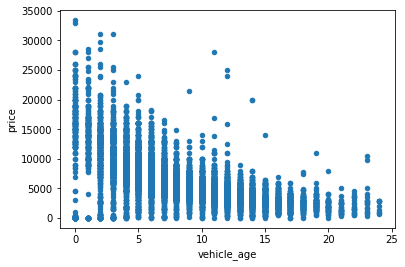

In [124]:
sedan.plot(x="vehicle_age", y="price", kind='scatter')

Just like SUVs, there is a negative relationship between price and vehicle age among sedans. The older the vehicle the lower the price and the newer the vehicle the higher the price

In [125]:
#mileage - scatte

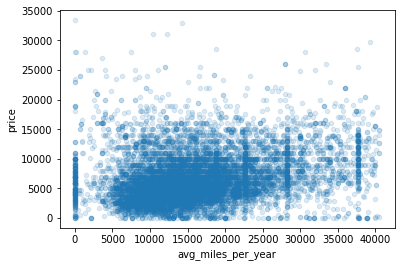

In [126]:
sedan.plot(x="avg_miles_per_year", y="price", kind='scatter' , alpha= 0.15)

Like SUVs, there doesnt seem to be a strong correlation between mileage and price

In [127]:
#condition - scatter

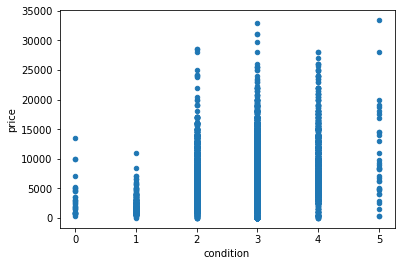

In [128]:
sedan.plot(x="condition", y="price", kind='scatter' )

Like SUVs, there is a positive correlation between price and the condition of the vehicle. The better the condition, the higher the price and vice-versa. 

In [129]:
#transmission type - box (remove categories with less than 50 ads)

In [130]:
sedan['transmission'].value_counts()

automatic    9872
manual        531
other         103
Name: transmission, dtype: int64

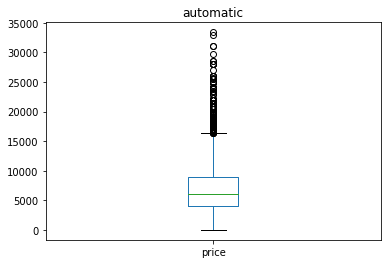

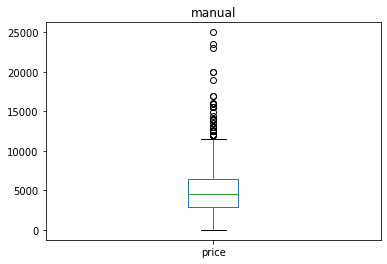

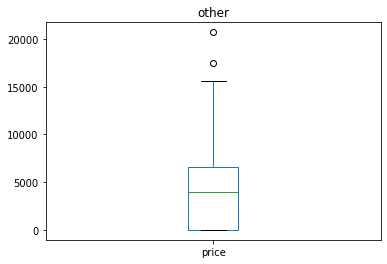

In [131]:
for name, group_data in sedan.groupby('transmission'):
    group_data.plot(y='price', kind='box' , title=name)

Interestingly, sedans don't follow the same price pattern as SUVs in relation to transmission types.The prices between automatic and manual seem closer and automatic actually have higher prices.

In [132]:
#color - box (remove categories with less than 50 ads)

In [133]:
sedan['paint_color'].value_counts()

unknown    1877
silver     1784
black      1527
grey       1387
white      1310
blue       1082
red         832
custom      244
brown       231
green       179
purple       25
yellow       20
orange        8
Name: paint_color, dtype: int64

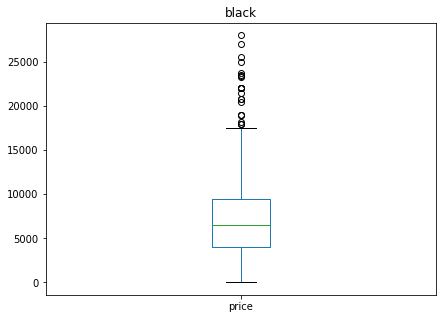

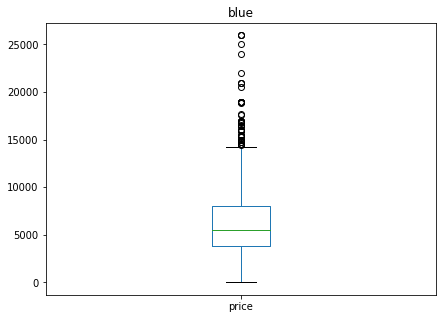

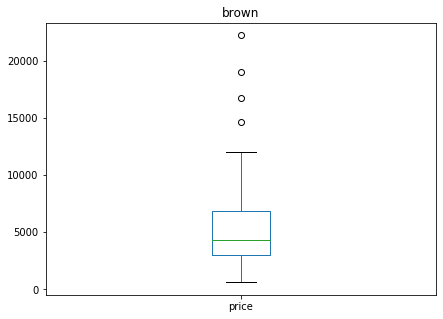

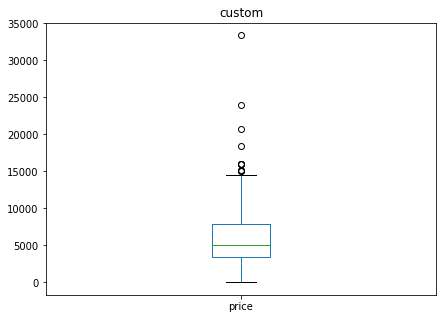

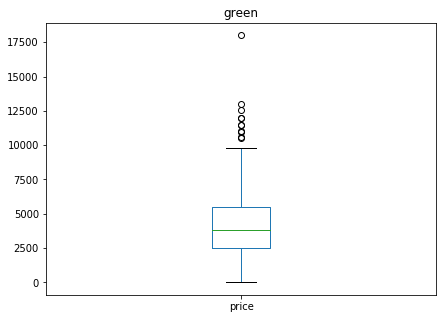

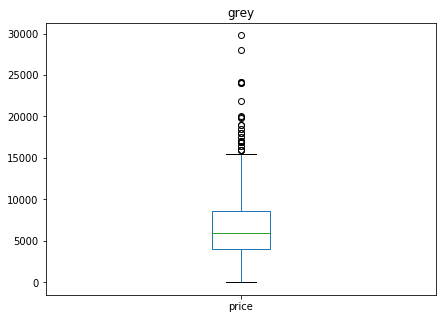

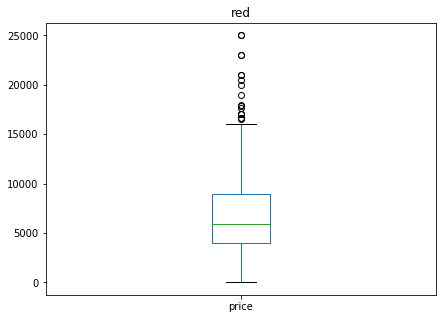

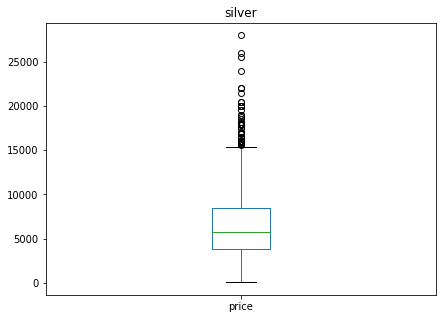

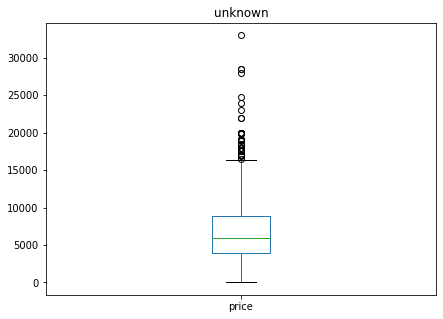

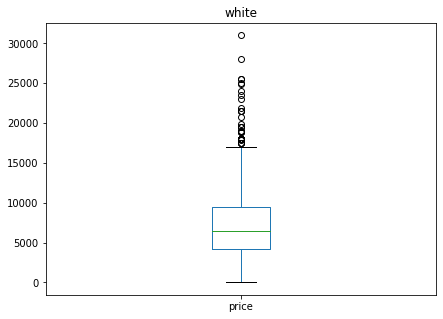

In [134]:
for name, group_data in sedan.groupby('paint_color'):
    if len(group_data) > 50:
        group_data.plot(y='price', kind='box' , title=name , figsize= (7,5))

As with SUVs, there doesn't seem to be a strong correlation between pain color and price. The only thing to notice is that colors with the widest range of prices in order are black, white, and silver expectedly. 

### Conclusion

In this EDA step, we have uncovered some insights that can be useful for this business and explored potential connections that were only visible upon plotting the data. We also explored the importance of removing outliers that are not representative of common data and their effect.

### Step 5. Overall conclusion

The main objective of this project is to discover what factors affect a vehicle's price. During the process we uncovered additional insights related to activity of the site and inventory. Below are the findings: 

**Activity on the Site**
- Activity is consistent, with the number of ads and the days a car is listed remaining around the same month after month. 

**Inventory**
- Although we have 13 different types of vehicles in our site. 84% of the inventory is of 4 types (SUV, sedan, truck, and pickup). Is this what the business intended? Do we want to focus on these or diversify our inventory?
- Buses are a particular weak area for us making up less than 1% of our inventory, with a high price, and are listed the longsest. 
- Convertibles seem to be an emerging type for us thanks to being listed for the shortest amount of time (assumingly a sign of demand) while making less than 1% of our inventory. 

**Price**
- After a closer look at our two most popular vehicle types, we have found factors that impact price:
- Vehicle Age: Newer vehicles are more expensive than older ones
- Condition: As condition improves so does price. 
- Transmission Type: Depending on the vehicle type we can see that certain transmission types are more expensive. For example, SUVs with a manual transmission are more expensive thatn automatic (perhaps related to supply). 


*Of notice is that the average miles per year did not have the effect of price that was expected and paint color did not affect price either.*
